In [44]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df.job_skills.apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


<Axes: title={'center': 'Job work from home'}>

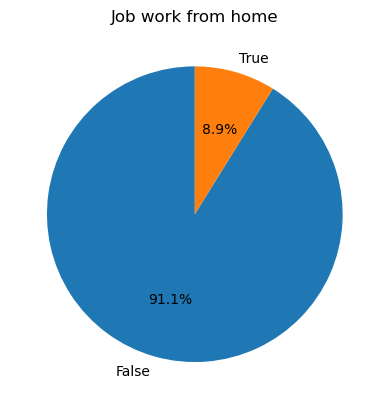

In [6]:
df["job_work_from_home"].value_counts().plot(kind="pie", startangle=90, autopct="%1.1f%%", ylabel="", title="Job work from home")

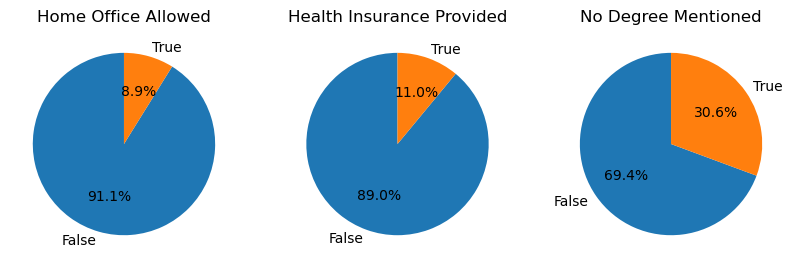

In [14]:
fig, ax = plt.subplots(1, 3)

columns = {
  "job_work_from_home":"Home Office Allowed",
  "job_health_insurance":"Health Insurance Provided",
  "job_no_degree_mention":"No Degree Mentioned"
}

for i, (key, val) in enumerate(columns.items()):
  df_conditional = df[key].value_counts()
  ax[i].pie(df_conditional, startangle=90, autopct="%1.1f%%", labels=[False, True])
  ax[i].set_ylabel("")
  ax[i].set_title(val)
fig.set_figheight(5)
fig.set_figwidth(10)
plt.show()

In [15]:
df_JSD = df["job_schedule_type"].value_counts()
df_JSD

job_schedule_type
Full-time                                701727
Contractor                                34793
Internship                                 8742
Part-time                                  7881
Full-time and Part-time                    6287
Full-time and Temp work                    2603
Full-time and Internship                   2340
Full-time and Contractor                   2292
Contractor and Temp work                   2283
Temp work                                  2169
Full-time, Part-time, and Internship        264
Part-time and Internship                    255
Temp work and Internship                    211
Full-time, Contractor, and Temp work        194
Full-time, Temp work, and Internship        173
Part-time and Contractor                    160
Full-time, Part-time, and Temp work         131
Full-time, Part-time, and Contractor        119
Part-time and Temp work                     111
Pekerjaan tetap                              59
Volunteer             

In [19]:
str = "Full-time and Contractor"
if(", and" in str):
  str = str.replace(", and", ",")
elif("and" in str):
  str = str.replace(" and", ",")
str

'Full-time, Contractor'

In [47]:
def make_job_schedule_list(str):
  if pd.isna(str):
    return str
  if(", and" in str):
    str = str.replace(", and", ",")
  elif("and" in str):
    str = str.replace(" and", ",")
  
  return [item.strip() for item in str.split(",")]


In [48]:
df_schedules = df.copy()
df_schedules["job_schedule_type"] = df_schedules["job_schedule_type"].apply(make_job_schedule_list)

In [50]:
df_schedules = df_schedules.explode("job_schedule_type")

In [52]:
df_schedules = df_schedules["job_schedule_type"].value_counts().head(4)

In [45]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


<Axes: ylabel='count'>

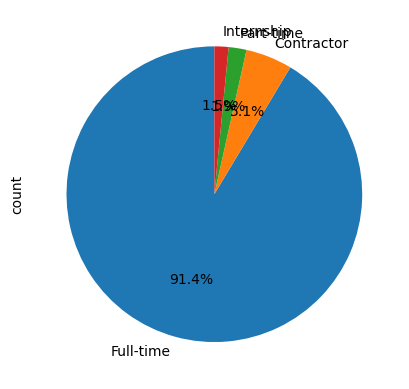

In [53]:
df_schedules.plot(kind="pie", startangle=90, autopct="%1.1f%%")